In [35]:
# libraries
import warnings 
warnings.filterwarnings('ignore')

# udf
round2d = lambda x: round(x, 2)
sigmoid = lambda x: 1/(1+np.exp(-x))
relu = lambda x: max(0, x)
leaky_relu = lambda x: x if x>0 else 0.7 * x

def map_many(iterable, function, *other):
    if other:
        return map_many(map(function, iterable), *other)
    return map(function, iterable)

def applythreshold(x, th=0.5):
    # input(=x) should be between 0 and 1
    if (x>=th) & (x<=1):
        return 1
    elif (x>=0) & (x<th):
        return 0
    else:
        return None

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

def map_many(iterable, function, *other):
    if other:
        return map_many(map(function, iterable), *other)
    return map(function, iterable)

# round2d = lambda x: round(x, 2)
def round2d(x):
    return round(x, 2)

# sigmoid = lambda x: 1/(1+np.exp(-x))
def sigmoid(x):
    # lambda x: 1/(1+np.exp(-x))   # sigmoid
    return 1 / (1 + np.exp(-x))

# relu = lambda x: max(0, x)
def relu(x):
    return max(0.0, x)

# leaky_relu = lambda x: x if x>0 else 0.7 * x
# address the problem of zero gradients for negative value
def leaky_relu(x):
    # address the problem of zero gradients for negative value
    if x > 0:
        return x
    else:
        return 0.01 * x
    
def applythreshold(x, th=0.5):
    # input(=x) should be between 0 and 1
    if (x>=th) & (x<=1):
        return 1
    elif (x>=0) & (x<th):
        return 0
    else:
        return None

0.0066928509242848554

0.11920292202211755

0.5

0.8807970779778823

0.9933071490757153

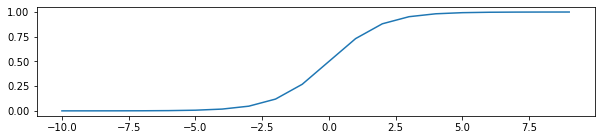

In [4]:
# sigmoid
x = np.arange(-10, 10, 1)
y = np.array(list(map(sigmoid, x)))
plt.figure(figsize=(10, 2))
plt.plot(x, y)

display(sigmoid(-5), sigmoid(-2), sigmoid(0), sigmoid(2), sigmoid(5))

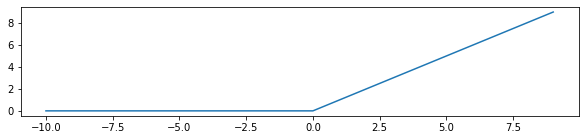

In [5]:
# relu
x = np.arange(-10, 10, 1)
y = np.array(list(map(relu, x)))
plt.figure(figsize=(10, 2))
plt.plot(x, y)

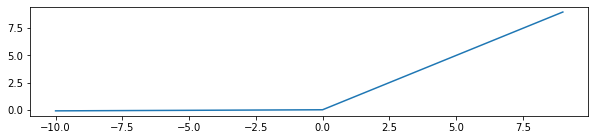

In [6]:
# leaky_relu
x = np.arange(-10, 10, 1)
y = np.array(list(map(leaky_relu, x)))
plt.figure(figsize=(10, 2))
plt.plot(x, y)

In [7]:
feature_x = np.array([-2.5, -1.5, -0.7, 0.2, 0.3, 0.8, 1.2, 2.2, 2.9, 4.7])
label_actual  = np.array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1])
probs = np.array(list(map_many(feature_x, sigmoid, round2d)))   # 각각의 점들이 1일 확률
probs

array([0.08, 0.18, 0.33, 0.55, 0.57, 0.69, 0.77, 0.9 , 0.95, 0.99])

In [8]:
predicted_labels = np.array(list(map_many(feature_x, sigmoid, applythreshold))); predicted_labels
# 각각의 점들을 예측한 라벨들 >> array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [9]:
print('* actual y: {}'.format(label_actual))
print('* probs: {}'.format(probs))

* actual y: [0 0 1 0 1 1 1 1 1 1]
* probs: [0.08 0.18 0.33 0.55 0.57 0.69 0.77 0.9  0.95 0.99]


In [10]:
# 각 점의 loss 값들
label_actual*np.log(probs) + (1-label_actual)*np.log(1-probs)

array([-0.08338161, -0.19845094, -1.10866262, -0.7985077 , -0.56211892,
       -0.37106368, -0.26136476, -0.10536052, -0.05129329, -0.01005034])

In [11]:
# 모든 점들에서 로스들의 평균
N = len(label_actual)
-1/N * (sum(  label_actual*np.log(probs) + (1-label_actual)*np.log(1-probs)  ))

0.3550254377979932

In [12]:
arr_prob = np.array([])
for i in range(len(label_actual)):
    if label_actual[i] == predicted_labels[i]:
        np.append(arr_prob, probs[i])
    elif label_actual[i] != predicted_labels[i]:
        np.append(arr_prob, probs[i])
    else:
        pass

In [13]:
# 0.08: 해당 점이 1일 확률 >> 스레드 씌우면 0 >> 실제 0 
# 0.18: 해당 점이 1일 확률 >> 스레드 씌우면 0 >> 실제 0 
# 0.33: 해당 점이 1일 확률 >> 스레드 씌우면 0 >> 실제 1 
# 0.55: 해당 점이 1일 확률 >> 스레드 씌우면 1 >> 실제 0 
# 0.57: 해당 점이 1일 확률 >> 스레드 씌우면 1 >> 실제 1 
# 0.69: 해당 점이 1일 확률 >> 스레드 씌우면 1 >> 실제 1 
# 0.77: 해당 점이 1일 확률 >> 스레드 씌우면 1 >> 실제 1 
# 0.90: 해당 점이 1일 확률 >> 스레드 씌우면 1 >> 실제 1 
# 0.95: 해당 점이 1일 확률 >> 스레드 씌우면 1 >> 실제 1 
# 0.99: 해당 점이 1일 확률 >> 스레드 씌우면 1 >> 실제 1 

In [14]:
# y: 녹색이면 1, 빨강이면 0  
# p(y): 예측된 녹색이 될 확률 = sigmoid(x) 값  

In [15]:
sigmoid(-2.5), sigmoid(-0.7), sigmoid(-0.2), sigmoid(2.2)

(0.07585818002124355,
 0.3318122278318339,
 0.45016600268752216,
 0.9002495108803148)

In [16]:
sigmoid(0.1), sigmoid(0.2), sigmoid(0.3), sigmoid(2.2)

(0.52497918747894, 0.549833997312478, 0.574442516811659, 0.9002495108803148)

In [17]:
sigmoid(-2.5)

0.07585818002124355